<a href="https://colab.research.google.com/github/Thi-Fer/Imersao-Alura-Python/blob/main/Imers%C3%A3o_Python_Previs%C3%A3o_S%C3%A9ries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592850,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216751,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [8]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [9]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [10]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7shtti4/ejt9qxg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7shtti4/hpf4h0ep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67596', 'data', 'file=/tmp/tmpn7shtti4/ejt9qxg3.json', 'init=/tmp/tmpn7shtti4/hpf4h0ep.json', 'output', 'file=/tmp/tmpn7shtti4/prophet_modelzh3yha8z/prophet_model-20240329144049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

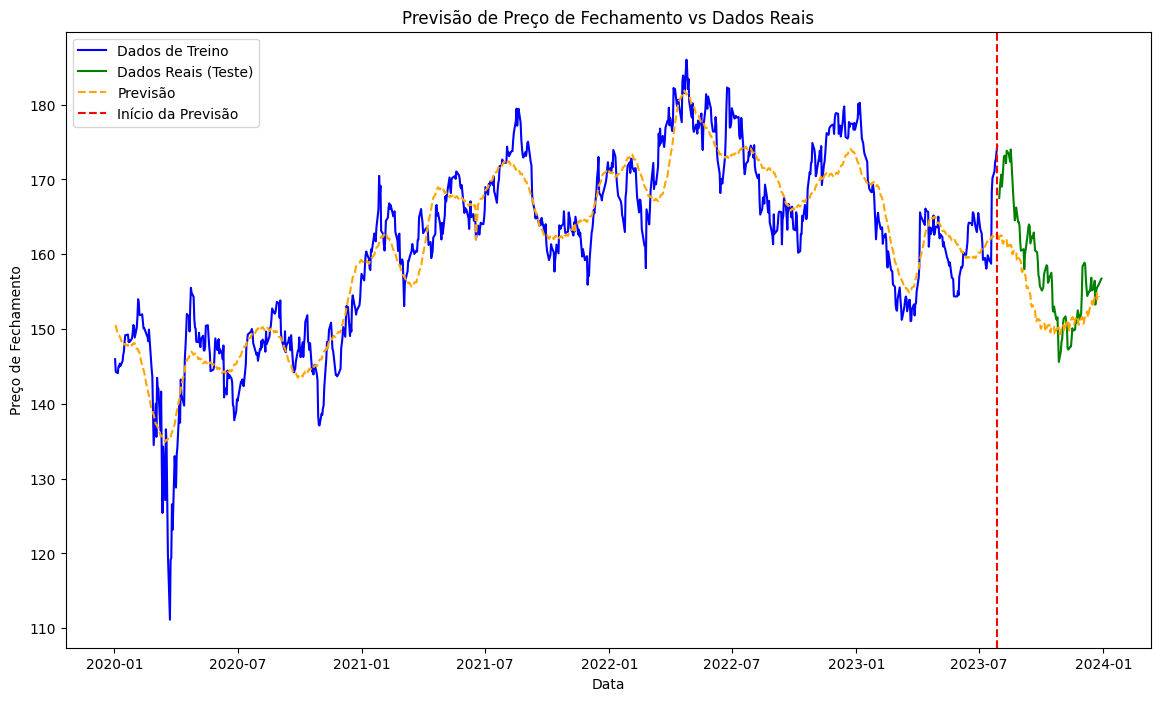

In [12]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

In [4]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados_lu = yf.download("MGLU3.SA", start="2020-01-01", end="2023-12-31", progress=False)
dados_lu = dados_lu.reset_index()

dados_lu

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,11.294029,11.534875,11.156069,11.534875,11.501505,31647665
1,2020-01-03,11.340795,11.534875,11.294029,11.431989,11.398917,28586477
2,2020-01-06,11.317412,11.530198,11.177113,11.441342,11.408243,29251060
3,2020-01-07,11.443681,11.504477,11.340795,11.408606,11.375602,28673292
4,2020-01-08,11.368855,11.773382,11.340795,11.759352,11.725333,42773657
...,...,...,...,...,...,...,...
988,2023-12-21,2.001591,2.010945,1.926766,1.954825,1.954825,131069967
989,2023-12-22,1.964179,1.992238,1.926766,1.982885,1.982885,85955622
990,2023-12-26,2.001591,2.010945,1.954825,1.973532,1.973532,71005712
991,2023-12-27,1.982885,2.123183,1.954825,2.104477,2.104477,138673007


In [5]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_lu_treino = dados_lu[dados_lu['Date'] < '2023-01-01']
dados_lu_teste = dados_lu[dados_lu['Date'] >= '2023-01-01']

In [6]:
# Preparando os dados para o FBProphet
dados_lu_prophet_treino = dados_lu_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [14]:
# Criar e treinar o modelo
modelo_lu = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=True)

modelo_lu.add_country_holidays(country_name='BR')

modelo_lu.fit(dados_lu_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp98gk2t9d/cqgo8p7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98gk2t9d/nxs18cog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60853', 'data', 'file=/tmp/tmp98gk2t9d/cqgo8p7j.json', 'init=/tmp/tmp98gk2t9d/nxs18cog.json', 'output', 'file=/tmp/tmp98gk2t9d/prophet_modelgrw71z_y/prophet_model-20240329221152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
# Criar datas futuras para previsão até o final de 2023
futuro_lu = modelo_lu.make_future_dataframe(periods=360)
previsao_lu = modelo_lu.predict(futuro_lu)

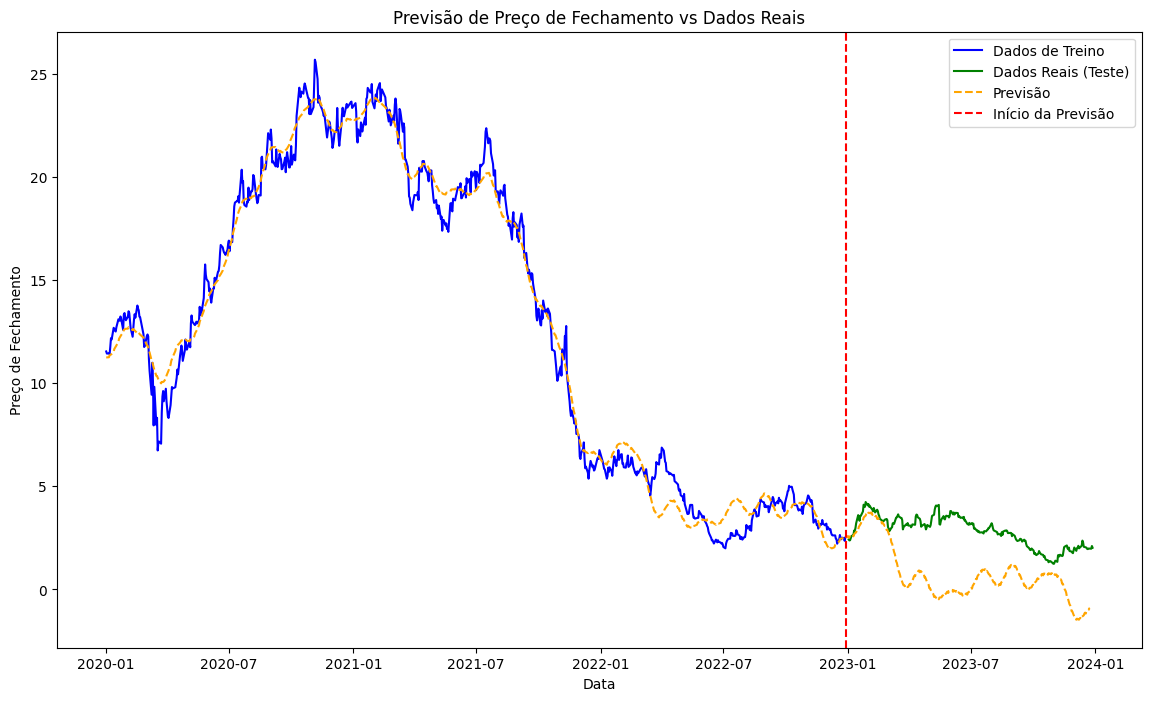

In [16]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_lu_treino['Date'], dados_lu_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_lu_teste['Date'], dados_lu_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao_lu['ds'], previsao_lu['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_lu_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()